# Project 2:  Holiday weather

by Rob Griffiths and sreeramh4, 11 September 2015, updated 12 April 2017, 18 October and 20 December 2017 and 21 November 2018

This is the project notebook for the second part of The Open University's _Learn to code for Data Analysis_ course.

There is nothing I like better than taking a holiday. In the winter I like to have a two week break in a country where I can be guaranteed sunny dry days. In the summer I like to have two weeks off relaxing in my garden in London. However I'm often disappointed because I pick a fortnight when the weather is dull and it rains. So in this project I am going to use the historic weather data from the Weather Underground for London + Brasilia to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2016 may be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'London_2014.csv' file. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
london = read_csv('London_2014.csv', skipinitialspace=True)
brasilia = read_csv('Brasilia_BSB_2014.csv', skipinitialspace=True)

In [5]:
brasilia #displaying the table

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,31,24,17,19,18,16,94,64,33,...,19,11,10,14,5,NaN,0.00,3.0,Thunderstorm,125<br />
1,2014-1-2,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,NaN,0.00,2.0,NaN,102<br />
2,2014-1-3,32,24,18,20,15,11,88,55,19,...,19,13,10,19,6,NaN,0.00,2.0,NaN,133<br />
3,2014-1-4,32,25,18,17,13,8,77,47,16,...,19,12,10,24,6,NaN,0.00,2.0,NaN,106<br />
4,2014-1-5,30,24,19,16,13,9,83,48,23,...,19,12,10,24,8,NaN,0.00,3.0,Rain,106<br />
5,2014-1-6,30,24,18,19,16,11,94,62,20,...,19,11,10,19,5,NaN,1.02,3.0,Thunderstorm,14<br />
6,2014-1-7,29,23,18,17,15,12,88,58,27,...,19,11,10,24,6,NaN,0.00,2.0,Thunderstorm,85<br />
7,2014-1-8,29,22,15,15,13,10,88,55,22,...,19,12,10,19,8,NaN,0.00,2.0,NaN,115<br />
8,2014-1-9,29,24,18,16,13,10,73,50,29,...,19,11,10,21,8,NaN,0.00,3.0,NaN,110<br />
9,2014-1-10,28,24,19,16,15,13,73,55,34,...,19,12,10,23,10,NaN,0.00,3.0,Thunderstorm,94<br />


In [4]:
brasilia.columns

#to check the column headings. 

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

Like last time the last column 'WindDirDegrees has <br/> attached to it and all its elements

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [2]:
london = london.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [9]:
brasilia = brasilia.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})
brasilia.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [3]:
london['WindDirDegrees'] = london['WindDirDegrees'].str.rstrip('<br />')

In [8]:
brasilia['WindDirDegrees'] = brasilia['WindDirDegrees'].str.rstrip('<br />')
brasilia['WindDirDegrees']

0      125
1      102
2      133
3      106
4      106
5       14
6       85
7      115
8      110
9       94
10     117
11      78
12      91
13      89
14     218
15      55
16      68
17     150
18      63
19       8
20     357
21      40
22      66
23     197
24      48
25      69
26     147
27      99
28      87
29     103
      ... 
335    107
336     89
337    303
338    220
339     89
340    112
341     77
342     73
343     31
344     85
345    358
346    327
347    347
348    349
349    286
350    342
351    333
352    342
353    358
354    333
355    355
356    326
357    114
358    110
359    109
360    101
361    114
362    266
363    266
364    210
Name: WindDirDegrees, Length: 365, dtype: object

and change the values in the `'WindDirDegrees'` column to `float64`:

In [4]:
london['WindDirDegrees'] = london['WindDirDegrees'].astype('float64')   

In [11]:
brasilia['WindDirDegrees'] = brasilia['WindDirDegrees'].astype('float64')
brasilia['WindDirDegrees'].dtype

dtype('float64')

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [5]:
london['GMT'] = to_datetime(london['GMT'])

For Brasilia we will have to change the Date column into datetime64 datatype

In [13]:
brasilia['Date'].dtype

dtype('O')

In [18]:
brasilia['Date'] = to_datetime(brasilia['Date'])
brasilia.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [6]:
london.index = london['GMT']

In [19]:
brasilia.index = brasilia['Date']
brasilia

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,31,24,17,19,18,16,94,64,33,...,19,11,10,14,5,NaN,0.00,3.0,Thunderstorm,125.0
2014-01-02,2014-01-02,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,NaN,0.00,2.0,NaN,102.0
2014-01-03,2014-01-03,32,24,18,20,15,11,88,55,19,...,19,13,10,19,6,NaN,0.00,2.0,NaN,133.0
2014-01-04,2014-01-04,32,25,18,17,13,8,77,47,16,...,19,12,10,24,6,NaN,0.00,2.0,NaN,106.0
2014-01-05,2014-01-05,30,24,19,16,13,9,83,48,23,...,19,12,10,24,8,NaN,0.00,3.0,Rain,106.0
2014-01-06,2014-01-06,30,24,18,19,16,11,94,62,20,...,19,11,10,19,5,NaN,1.02,3.0,Thunderstorm,14.0
2014-01-07,2014-01-07,29,23,18,17,15,12,88,58,27,...,19,11,10,24,6,NaN,0.00,2.0,Thunderstorm,85.0
2014-01-08,2014-01-08,29,22,15,15,13,10,88,55,22,...,19,12,10,19,8,NaN,0.00,2.0,NaN,115.0
2014-01-09,2014-01-09,29,24,18,16,13,10,73,50,29,...,19,11,10,21,8,NaN,0.00,3.0,NaN,110.0


## Finding a summer break - Rob

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [7]:
summer = london.loc[datetime(2014,6,1) : datetime(2014,8,31)]

In [23]:
summer = brasilia.loc[datetime(2014,9,1) : datetime(2014,11,30)]
summer #new Dataframe containing only the months of choice, helps make analysis easier.

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-01,2014-09-01,32,28,23,15,12,9,61,39,17,...,19,12,8,23,5,NaN,0.00,4.0,NaN,290.0
2014-09-02,2014-09-02,32,27,21,15,13,9,64,43,15,...,19,12,10,14,5,NaN,0.00,4.0,NaN,339.0
2014-09-03,2014-09-03,30,24,19,18,15,13,88,64,33,...,19,9,3,32,8,53.0,13.97,4.0,Rain-Thunderstorm,210.0
2014-09-04,2014-09-04,30,24,18,16,14,11,83,54,21,...,19,13,10,16,6,NaN,0.00,3.0,NaN,123.0
2014-09-05,2014-09-05,30,26,21,15,13,12,64,47,25,...,19,13,10,27,11,NaN,0.00,2.0,NaN,101.0
2014-09-06,2014-09-06,27,22,17,15,9,6,83,45,20,...,19,19,19,24,14,NaN,0.00,NaN,NaN,103.0
2014-09-07,2014-09-07,28,21,15,8,6,3,55,37,13,...,19,19,19,24,11,NaN,0.00,NaN,NaN,123.0
2014-09-08,2014-09-08,28,22,16,9,7,4,59,38,14,...,19,19,19,24,14,NaN,0.00,NaN,NaN,103.0
2014-09-09,2014-09-09,29,21,14,9,7,3,67,38,13,...,19,19,19,21,10,40.0,0.00,NaN,NaN,81.0


I now look for the days with warm temperatures.

In [25]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-03,2014-09-03,30,24,19,18,15,13,88,64,33,...,19,9,3,32,8,53.0,13.97,4.0,Rain-Thunderstorm,210.0
2014-09-04,2014-09-04,30,24,18,16,14,11,83,54,21,...,19,13,10,16,6,NaN,0.00,3.0,NaN,123.0
2014-09-06,2014-09-06,27,22,17,15,9,6,83,45,20,...,19,19,19,24,14,NaN,0.00,NaN,NaN,103.0
2014-09-07,2014-09-07,28,21,15,8,6,3,55,37,13,...,19,19,19,24,11,NaN,0.00,NaN,NaN,123.0
2014-09-08,2014-09-08,28,22,16,9,7,4,59,38,14,...,19,19,19,24,14,NaN,0.00,NaN,NaN,103.0
2014-09-09,2014-09-09,29,21,14,9,7,3,67,38,13,...,19,19,19,21,10,40.0,0.00,NaN,NaN,81.0
2014-09-10,2014-09-10,30,23,17,10,8,6,59,37,15,...,19,14,10,21,8,NaN,0.00,2.0,NaN,103.0
2014-09-11,2014-09-11,31,23,17,10,7,0,59,35,10,...,19,15,10,19,6,NaN,0.00,1.0,NaN,117.0
2014-09-12,2014-09-12,30,24,18,9,4,0,52,29,7,...,19,19,19,27,11,NaN,0.00,NaN,NaN,98.0


Summer 2014 was rather cool in London: there are no days with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [20]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

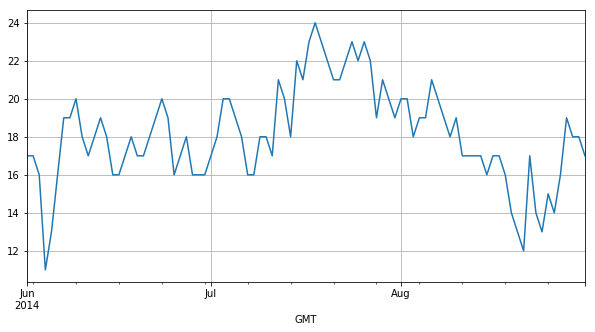

In [10]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the second half of July looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

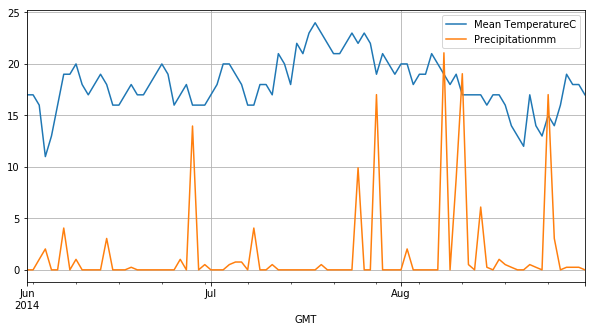

In [11]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The second half of July is still looking good, with just a couple of peaks showing heavy rain. Let's have a closer look by just plotting mean temperature and precipitation for July.  

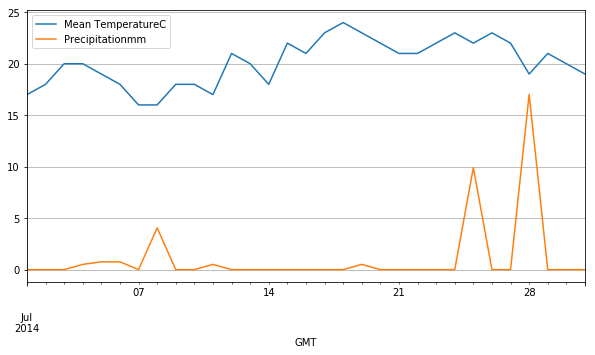

In [12]:
july = summer.loc[datetime(2014,7,1) : datetime(2014,7,31)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, second half of July looks pretty good, just two days that have significant rain, the 25th and the 28th and just one day when the mean temperature drops below 20 degrees, also the 28th.

## Conclusions

The graphs have shown the volatility of a British summer, but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. By the time you have finished this course you should be able to do that.

## Finding a Summer Break - SH

The months from September to November seems like a good time to visit. So we'll create a separate datframe to hold the data for those months

In [27]:
summer = brasilia.loc[datetime(2014,9,1) : datetime(2014,11,30)]
summer

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-01,2014-09-01,32,28,23,15,12,9,61,39,17,...,19,12,8,23,5,NaN,0.00,4.0,NaN,290.0
2014-09-02,2014-09-02,32,27,21,15,13,9,64,43,15,...,19,12,10,14,5,NaN,0.00,4.0,NaN,339.0
2014-09-03,2014-09-03,30,24,19,18,15,13,88,64,33,...,19,9,3,32,8,53.0,13.97,4.0,Rain-Thunderstorm,210.0
2014-09-04,2014-09-04,30,24,18,16,14,11,83,54,21,...,19,13,10,16,6,NaN,0.00,3.0,NaN,123.0
2014-09-05,2014-09-05,30,26,21,15,13,12,64,47,25,...,19,13,10,27,11,NaN,0.00,2.0,NaN,101.0
2014-09-06,2014-09-06,27,22,17,15,9,6,83,45,20,...,19,19,19,24,14,NaN,0.00,NaN,NaN,103.0
2014-09-07,2014-09-07,28,21,15,8,6,3,55,37,13,...,19,19,19,24,11,NaN,0.00,NaN,NaN,123.0
2014-09-08,2014-09-08,28,22,16,9,7,4,59,38,14,...,19,19,19,24,14,NaN,0.00,NaN,NaN,103.0
2014-09-09,2014-09-09,29,21,14,9,7,3,67,38,13,...,19,19,19,21,10,40.0,0.00,NaN,NaN,81.0


In [30]:
%matplotlib inline

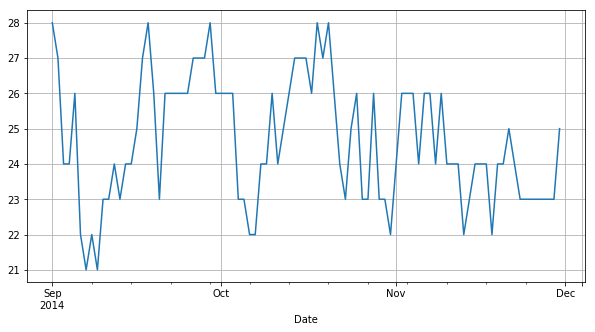

In [32]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Second week of September and 2nd week of October seems to be ideal choices with the mean temperature near 20C. Let's put precipitation on the chart to check on the rains.

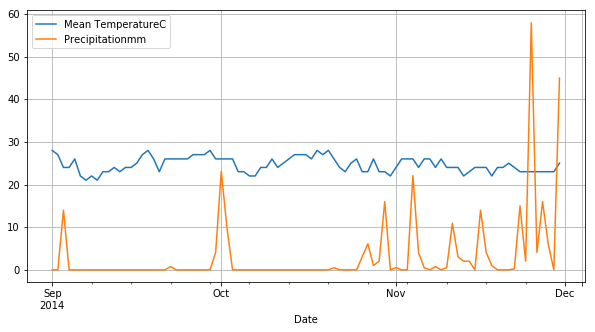

In [33]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The weather for the Second week of September and 2nd week of October still seem to hold good as the rains are mostly in the second week.
Let's take a closer look at September.

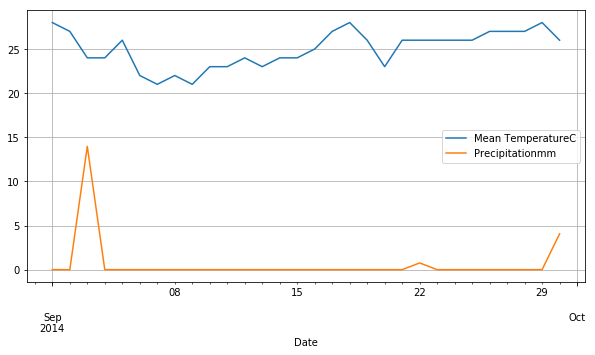

In [35]:
sept = summer.loc[datetime(2014,9,1) : datetime(2014,9,30)]
sept[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yep, Looks like the second and 3rd weeks of September are well free of the rains and the Mean Temperature is near 20 Degrees Celcius. That should work out just fine.

## Conclusion

The graphs have shown that the rains are mostly focussed on the first and second weeks of September and October, but the weeks in between had a pretty stable weather in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. But this might be a good place to start.